In [315]:
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SAMPLE_RATE = 44100
# SAMPLE_RATE = 16000

# 데이터

In [316]:
wav_dict = {
            '아니요' : 0,
            '네' : 1
            }

In [317]:
wav_files = []

for file in os.listdir(f'./record_yes_no/'):
    wav_files.append(f'./record_yes_no/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no/1.아니요_19.wav,아니요
1,./record_yes_no/1.네_33.wav,네
2,./record_yes_no/1.아니요_준석형_3.wav,아니요
3,./record_yes_no/1.아니요_32.wav,아니요
4,./record_yes_no/1.아니요_16.wav,아니요
...,...,...
143,./record_yes_no/1.네_38.wav,네
144,./record_yes_no/1.네_81.wav,네
145,./record_yes_no/1.네_67.wav,네
146,./record_yes_no/1.네_6.wav,네


In [318]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,./record_yes_no/1.아니요_19.wav,아니요,0
1,./record_yes_no/1.네_33.wav,네,1
2,./record_yes_no/1.아니요_준석형_3.wav,아니요,0
3,./record_yes_no/1.아니요_32.wav,아니요,0
4,./record_yes_no/1.아니요_16.wav,아니요,0
...,...,...,...
143,./record_yes_no/1.네_38.wav,네,1
144,./record_yes_no/1.네_81.wav,네,1
145,./record_yes_no/1.네_67.wav,네,1
146,./record_yes_no/1.네_6.wav,네,1


In [319]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(wav_df,
                                        test_size=0.1,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [320]:
train_data, val_data = train_test_split(train_data,
                                        test_size=0.2,
                                        stratify=train_data['class_label'],
                                        random_state=7)

In [321]:
len(train_data), len(val_data), len(test_data)

(106, 27, 15)

In [322]:
X_train = train_data['path']
y_train = train_data['class_label']

In [323]:
X_val = val_data['path']
y_val = val_data['class_label']

In [324]:
X_test = test_data['path']
y_test = test_data['class_label']

In [325]:
def get_mfcc(path):
    b, _ = librosa.core.load(path, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
        return pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
    except:
        print('bad file')
        return pd.Series([0]*40)

In [326]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = get_mfcc(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00033569
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01049805 0.0078125  0.00460815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.5449219e-04 9.7656250e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.

In [327]:
features_df

,feature,class_label
0,0 -464.390320 1 131.926361 2 31.36...,0
1,0 -495.852417 1 132.622543 2 21.66...,1
2,0 -461.028595 1 122.663383 2 22.80...,1
3,0 -445.164001 1 92.001961 2 36.98...,1
4,0 -492.475616 1 91.739044 2 41.36...,1
...,...,...
101,0 -515.869751 1 82.158760 2 43.13...,1
102,0 -515.655334 1 129.492264 2 34.63...,1
103,0 -405.212036 1 136.911530 2 28.12...,1
104,0 -476.089783 1 114.352180 2 36.92...,1


In [328]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = get_mfcc(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00219727 -0.00286865
 -0.00302124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0329895  0.03491211 0.03713989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.5776367e-04
  9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 

In [329]:
features_val_df

,feature,class_label
0,0 -495.387085 1 85.856743 2 40.59...,1
1,0 -435.762451 1 94.148026 2 37.74...,0
2,0 -459.771637 1 159.430496 2 26.37...,0
3,0 -435.801697 1 142.239578 2 32.70...,1
4,0 -448.929016 1 147.617798 2 27.01...,0
5,0 -498.602997 1 74.905289 2 40.88...,1
6,0 -403.764069 1 134.075394 2 21.12...,1
7,0 -441.039307 1 108.735374 2 39.61...,1
8,0 -479.923248 1 147.693054 2 23.87...,1
9,0 -446.017548 1 147.478012 2 8.13...,1


In [330]:
features_test = []

for i, wav in enumerate(X_test):
    mfccs = get_mfcc(wav)
    features_test.append([mfccs, y_test.values[i]])#, y_val[i]])

features_test_df = pd.DataFrame(features_test, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00134277 -0.00222778
 -0.00219727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00823975 -0.00830078
 -0.00836182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00653076 -0.00643921
 -0.00762939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00057

In [331]:
features_test_df

,feature,class_label
0,0 -496.072510 1 148.570465 2 38.19...,0
1,0 -459.432404 1 128.897980 2 27.54...,0
2,0 -456.072174 1 145.019318 2 21.84...,0
3,0 -472.923035 1 148.145126 2 23.97...,1
4,0 -470.695374 1 130.639206 2 41.65...,0
5,0 -454.224396 1 146.390182 2 9.46...,1
6,0 -455.440460 1 111.801971 2 47.61...,1
7,0 -440.697479 1 134.800308 2 26.21...,1
8,0 -495.485718 1 126.312843 2 17.95...,1
9,0 -519.307861 1 120.707634 2 29.29...,1


In [332]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [333]:
X_train.shape

(106, 80)

In [334]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [335]:
X_val.shape

(27, 80)

In [336]:
X_test = np.array(features_test_df.feature.tolist())
y_test = np.array(features_test_df.class_label.tolist())

In [337]:
X_test.shape

(15, 80)

# 모델

In [356]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#fitting RandomForest on the dataset
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)

#checking the accuracy of the model
print(rfc.score(X_test, y_test))

0.9333333333333333


In [357]:
predicted = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'accuracy score: {accuracy:.3}')

accuracy score: 0.933


In [358]:
rfc.predict_proba(X_test)

array([[0.68      , 0.32      ],
       [0.75333333, 0.24666667],
       [0.67333333, 0.32666667],
       [0.16      , 0.84      ],
       [0.38      , 0.62      ],
       [0.09333333, 0.90666667],
       [0.18      , 0.82      ],
       [0.2       , 0.8       ],
       [0.12      , 0.88      ],
       [0.1       , 0.9       ],
       [0.16666667, 0.83333333],
       [0.10666667, 0.89333333],
       [0.50666667, 0.49333333],
       [0.12      , 0.88      ],
       [0.14666667, 0.85333333]])

<AxesSubplot: >

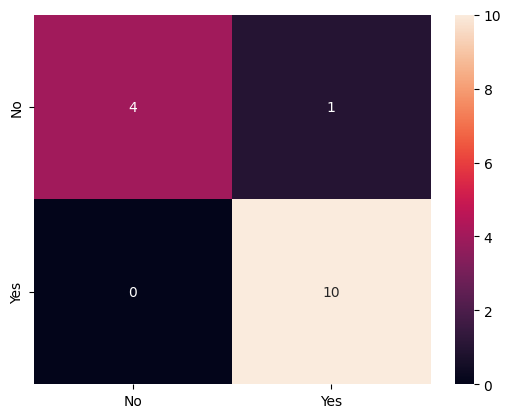

In [359]:
# cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=wav_dict.keys(), index=wav_dict.keys())
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(cm, annot=True)

In [360]:
# GradientBoostingClassifier 

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                         max_depth=5, random_state=0).fit(X_train, y_train)

# XGBClassifier
clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

<AxesSubplot: >

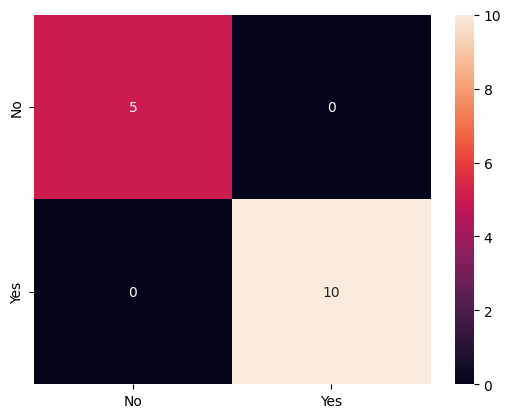

In [361]:
predicted = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(cm, annot=True)

In [362]:
clf.predict_proba(X_test)

array([[0.9658679 , 0.0341321 ],
       [0.99641967, 0.00358035],
       [0.92297626, 0.07702376],
       [0.05217314, 0.94782686],
       [0.79250467, 0.20749535],
       [0.0225032 , 0.9774968 ],
       [0.03526813, 0.9647319 ],
       [0.00965691, 0.9903431 ],
       [0.0062359 , 0.9937641 ],
       [0.00475365, 0.99524635],
       [0.02815831, 0.9718417 ],
       [0.0050661 , 0.9949339 ],
       [0.9199931 , 0.08000688],
       [0.00917101, 0.990829  ],
       [0.00544262, 0.9945574 ]], dtype=float32)

# 음성인식

In [363]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [364]:
reverse_dict

{0: '아니요', 1: '네'}

In [373]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = SAMPLE_RATE  # Sample rate
duration = 5  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
recording = recording.flatten()
print(recording.shape)


# Extract MFCCs from microphone recording
listen = []
gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)
mfccs =  pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)

# Use MFCCs as input to your models
# prediction = rfc.predict_proba(X_listen)   # RandomForest
prediction = clf.predict_proba(X_listen)  # XGBoost

print(prediction)
print(reverse_dict[np.argmax(prediction)])


recording...
(220500,)
(1, 80)
[[0.06123823 0.9387618 ]]
네


/tmp/ipykernel_95613/1072411240.py:17: FutureWarning: Pass y=[-0.04251099 -0.03616333 -0.03735352 ... -0.04977417 -0.05044556
 -0.04586792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)


## pyaudio

In [247]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = SAMPLE_RATE

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 5

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

listen = []
mfccs = get_mfcc("./output.wav")
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)

# # Use MFCCs as input to your rfc model
# prediction = rfc.predict_proba(X_listen)
prediction = clf.predict_proba(X_listen)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

start recording...
recording stopped
(1, 80)
[[2.64688035e-07 9.99999735e-01]]
네


/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.05111694  0.03256226  0.04179382 ... -0.01937866 -0.02137756
 -0.01292419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
